# Ildebrando Magnani

#### Conditioning and Stability Problems:

In [144]:
import numpy as np
import scipy.linalg as la
import sympy as sy
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
# Problem 1

def cond_number(A):
    U, s, Vh = la.svd(A)
    s_max = s[0]
    s_min = s[len(s)-1]
    
    if s_min > 0:
        k_A = s_max / s_min
        return k_A
    else:
        return np.inf

In [146]:
A = np.random.rand(5, 5)
Q, R = la.qr(A)
print(cond_number(A))
print(np.linalg.cond(A))
print(cond_number(Q))

66.5664806124
66.5664806124
1.0


In [147]:
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())
r = np.random.normal(1, 1e-10, len(w_coeffs))
w_roots = np.array(w.all_roots())

In [182]:
def p2():
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_coeffs = np.array(w.all_coeffs())
    w_roots = np.array(w.all_roots())
    fig, ax = plt.subplots(figsize=(8,6))
    abs_k_list = []
    rel_k_list = []
    for i in range(100):
        
        r = np.random.normal(1, 1e-10, len(w_coeffs))
        new_coeffs = w_coeffs * r
        new_roots = np.roots(np.poly1d(new_coeffs))
        new_roots = np.sort(new_roots)
        w_roots = np.array(w.all_roots())
        w_roots = np.sort(w_roots)
        zeros = np.zeros_like(w_roots)
        ax.plot(new_roots.real, new_roots.imag, "k,")
        ax.plot(w_roots, zeros, 'o')
        plt.xlabel("Real Axis")
        plt.ylabel("Imaginary Axis")
        abs_k = np.linalg.norm(new_roots - w_roots, np.inf) / np.linalg.norm(new_coeffs - w_coeffs, np.inf)
        rel_k = np.linalg.norm(w_coeffs, np.inf) / np.linalg.norm(w_roots, np.inf) * abs_k
        abs_k_list.append(abs_k)
        rel_k_list.append(rel_k)
    
    return np.mean(abs_k_list), np.mean(rel_k_list)

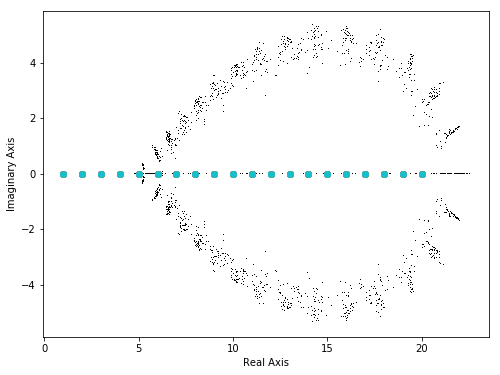

In [183]:
abs_k, rel_k = p2()

In [184]:
abs_k

3.75295996427414e-9

In [185]:
rel_k

2590247885.59361

In [189]:
# Problem 3

def p3(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    eigvals_A = la.eigvals(A)
    eigvals_AH = la.eigvals(A+H)
    k_A_hat = np.linalg.norm(eigvals_A - eigvals_AH, 2) / np.linalg.norm(H, 2)
    k_A = k_A_hat * np.linalg.norm(A, 2) / np.linalg.norm(eigvals_A, 2)
    return k_A_hat, k_A

In [190]:
A = np.random.rand(5, 5)
p3(A)

(0.63442055809135545, 0.66731372261905197)

In [192]:
# Problem 4

